# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# отображение в jupyter'e
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# стиль seaborn
# style.available выводит все доступные стили
from matplotlib import style
style.use('seaborn')

# более чёткое отображение графиков
%config InlineBackend.figure_format = 'svg' 

# увеличение дефолтного размера графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# замена шрифта и цветовой палетки на более приемлимые
font = {'family': 'Fira Sans', 'weight': 'light', 'style': 'italic', 'size': 11} 
colors = ['#52057f', '#bf033b', '#F84669', '#ff6908', '#ffc719',
          '#598c14', '#335238', '#4a8594', '#051736', '#000000', '#706357']

# отключение предупреждений Anaconda
import warnings
warnings.simplefilter('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

In [2]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', -1)

In [3]:
data = pd.read_csv("students_data.csv")
data.shape

(1044, 36)

In [4]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  
## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 10](#task10)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

***
**Comment:** *Прежде чем определять тип каждого признака, проверим их значения на наличие опечаток и ошибок. Для этого составим **DataFrames** для каждого признака, первый столбец в котором - его уникальные значения, второй - количество этих значений.*
***

In [6]:
mistakes_list = []

for i in range(len(data.columns.tolist())):
    mistakes_list.append('mistakes_df' + str(i))
    
for i in range(1, len(data.columns.tolist())):
    mistakes_list[i] = pd.DataFrame(data[data.columns.tolist()[i]].value_counts().index.tolist(),
                                    columns=[data.columns.tolist()[i]])
    mistakes_list[i]['values'] = data[data.columns.tolist()[i]].value_counts().tolist()
    display(mistakes_list[i])

,Subject,values
0,Por,649
1,Math,395


,school,values
0,GP,772
1,MS,272


,sex,values
0,F,591
1,M,446
2,m,7


,age,values
0,16,281
1,17,277
2,18,222
3,15,194
4,19,56
5,20,9
6,21,3
7,22,2


,address,values
0,U,759
1,R,285


,famsize,values
0,GT3,738
1,LE3,306


,Pstatus,values
0,T,918
1,A,121
2,t,5


,Medu,values
0,4,306
1,2,289
2,3,238
3,1,202
4,o,6
5,0,3


,Fedu,values
0,2,324
1,1,256
2,3,231
3,4,224
4,0,6
5,o,3


,Mjob,values
0,other,399
1,services,239
2,at_home,184
3,teacher,130
4,health,82
5,at-home,10


,Fjob,values
0,other,584
1,services,292
2,teacher,65
3,at_home,52
4,health,41
5,at-home,10


,reason,values
0,course,430
1,home,258
2,reputation,248
3,other,108


,guardian,values
0,mother,728
1,father,236
2,other,73
3,futher,7


,traveltime,values
0,1,623
1,2,320
2,3,77
3,4,24


,studytime,values
0,2,503
1,1,317
2,3,162
3,4,62


,failures,values
0,0,861
1,1,120
2,2,33
3,3,30


,schoolsup,values
0,no,925
1,yes,119


,famsup,values
0,yes,640
1,no,404


,paid,values
0,no,824
1,yes,220


,activities,values
0,no,528
1,yes,516


,nursery,values
0,yes,835
1,no,209


,higher,values
0,yes,955
1,no,89


,internet,values
0,yes,827
1,no,217


,romantic,values
0,no,664
1,yes,370


,famrel,values
0,4.0,508
1,5.0,283
2,3.0,167
3,2.0,46
4,1.0,30


,freetime,values
0,3,408
1,4,293
2,2,171
3,5,108
4,1,64


,goout,values
0,3,335
1,2,248
2,4,227
3,5,163
4,1,71


,Dalc,values
0,1.0,719
1,2.0,194
2,3.0,69
3,5.0,26
4,4.0,26


,Walc,values
0,1.0,393
1,2.0,231
2,3.0,199
3,4.0,138
4,5.0,73


,health,values
0,5,395
1,3,215
2,4,174
3,1,137
4,2,123


,absences,values
0,0,359
1,2,175
2,4,146
3,6,80
4,8,64
5,10,38
6,12,24
7,14,20
8,5,17
9,16,17


,cheating,values
0,yes,175
1,no,169


,G1,values
0,10,146
1,11,130
2,12,117
3,13,105
4,14,101
5,9,96
6,8,83
7,7,70
8,15,59
9,16,44


,G2,values
0,11,138
1,10,129
2,12,127
3,9,122
4,13,117
5,14,77
6,15,72
7,8,72
8,16,38
9,7,37


,G3,values
0,10,153
1,11,151
2,13,113
3,12,103
4,14,90
5,15,82
6,8,67
7,9,63
8,0,53
9,16,52


***
**Comment:** *Проведём замену выявленных опечаток на корректные значения.*
***

In [7]:
data['sex'] = data['sex'].replace('m', 'M')
data['Pstatus'] = data['Pstatus'].replace('t', 'T')
data['Medu'] = data['Medu'].replace('o', '0')
data['Fedu'] = data['Fedu'].replace('o', '0')
data['Mjob'] = data['Mjob'].replace('at-home', 'at_home')
data['Fjob'] = data['Fjob'].replace('at-home', 'at_home')
data['guardian'] = data['guardian'].replace('futher', 'father')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 36 columns):
ID            1044 non-null int64
Subject       1044 non-null object
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null object
Fedu          1044 non-null object
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1034 non-null object
famrel        1034 non-

***
**Comment:** *Распределим признаки по типам данных.*
***

In [9]:
values_df = pd.DataFrame(columns=['Сolumn name', 'Type'])

for i in range(len(data.columns.tolist())):
    values_list = data[data.columns.tolist()[i]].value_counts().index.tolist()
    if len(values_list) == 2 and type(values_list[i in range(len(values_list))]) == str:
        values_df.loc[i] = [data.columns.tolist()[i], 'бинарный']
    elif len(values_list) >= 3 and type(values_list[i in range(len(values_list))]) == str:
        values_df.loc[i] = [data.columns.tolist()[i], 'категориальный']
    elif len(values_list) == 5 and (type(values_list[i in range(len(values_list))]) == int
                                    or type(values_list[i in range(len(values_list))]) == float):
        values_df.loc[i] = [data.columns.tolist()[i], 'упорядоченный категориальный']
    else:
        values_df.loc[i] = [data.columns.tolist()[i], 'числовой']
        
values_df

,Сolumn name,Type
0,ID,числовой
1,Subject,бинарный
2,school,бинарный
3,sex,бинарный
4,age,числовой
5,address,бинарный
6,famsize,бинарный
7,Pstatus,бинарный
8,Medu,категориальный
9,Fedu,категориальный


***
**Comment:** *Для удобства последующей обработки данных приведём категориальные признаки **Medu** и **Fedu** к типу **int64**.*
***

In [10]:
data.Medu = data.Medu.astype('int64')
data.Fedu = data.Fedu.astype('int64')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 36 columns):
ID            1044 non-null int64
Subject       1044 non-null object
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1034 non-null object
famrel        1034 non-nu

In [12]:
data.head()

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13


### *Часть задания 10*

***
**Comment:** *Осуществим поиск дублирующихся записей по не зависящим от предмета и оценок по нему столбцам. Можно предположить, что абсолютно идентичные записи мог оставить один студент, который посещает оба курса.*
***

In [13]:
data_1 = data.drop(['ID', 'Subject', 'paid', 'cheating', 'G1', 'G2', 'G3'], axis=1)

index_list = data.index.tolist()
dd_list = data_1[data_1.duplicated(keep=False)].index.tolist()
dd_first_list = data_1[data_1.duplicated(keep='first')].index.tolist()

for i in range(len(dd_list)):
    index_list.remove(dd_list[i])

for i in range(len(index_list)):
    data_1 = data_1.drop(index_list[i])

print('Количество пар дубликатов: {}'.format(len(dd_first_list)))

Количество пар дубликатов: 77


In [14]:
# Получаем индексы пар - дубликатов и сразу заменяем ID второго на ID первого
for i in range(len(dd_first_list)):
    data_2 = data_1.drop(dd_first_list[i])
    index_list_1 = data_2[data_2.duplicated(keep=False)].index.tolist()
    unique_index = tuple(set(dd_list) - set(index_list_1))
    data.loc[unique_index[1],'ID'] = data.loc[unique_index[0]]['ID']

### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

***
**Comment:** *Посмотрим на распределение пропущенных значений в признаках с помощью графика HeatMap.*
**UPD:** *График очень красивый, однако достаточно долго строится, поэтому закрыт хэштегами.*
***

In [15]:
# fig = plt.figure()
# fig.set_size_inches(11.7, 8.27)

# sns.heatmap(data.isnull(), cbar = False, cmap=sns.color_palette('BuGn_r')).set_title('Heatmap of missing values')
# plt.show()

***
**Comment:** *Посмотрим, в каких признаках и в каком количестве присутствуют пропущенные значения.*
***

In [16]:
pd.isnull(data).sum()

ID            0  
Subject       0  
school        0  
sex           0  
age           0  
address       0  
famsize       0  
Pstatus       0  
Medu          0  
Fedu          0  
Mjob          0  
Fjob          0  
reason        0  
guardian      0  
traveltime    0  
studytime     0  
failures      0  
schoolsup     0  
famsup        0  
paid          0  
activities    0  
nursery       0  
higher        0  
internet      0  
romantic      10 
famrel        10 
freetime      0  
goout         0  
Dalc          10 
Walc          10 
health        0  
absences      0  
cheating      700
G1            0  
G2            0  
G3            0  
dtype: int64

***
**Comment:** *Видим, что в признаках **romantic, famrel, Dalc и Walk** присутствуют 10 пропущенных значений, а в признаке **cheating** более половины - 700. Восстановить последние не представлется возможным, поэтому целесообразно просто удалить признак. Остальные ячейки заполним значением __0__ для каждого признака (будет индентифицировать пропущенное значение), кроме **romantic**. В случае последнего обозначим пропущенное значение как **"minus"**.*
***

In [17]:
data.drop('cheating', axis='columns', inplace=True)

In [18]:
data.fillna({'famrel':0, 'Dalc':0, 'Walc':0}, inplace=True)
data['romantic'].fillna('minus', inplace = True)

***
**Comment:** *Сгенерируем новый **Dataframe**, значения каждого категориального признака в котором приведём к числовым с помощью **Label Encoder**. Выведем словарь, который проидентифицирует проведённые замены..*
***

In [19]:
label = LabelEncoder()

data_new = data.copy(deep=True)
encoders = {}

for col_name in data_new.columns[data_new.dtypes == 'object']:
    series = data_new[col_name]
    data_new[col_name] = pd.Series(
        label.fit_transform(series[series.notnull()]),
        index=series[series.notnull()].index
    )
    encoders[col_name] = dict(enumerate(label.classes_))

print(encoders)
data_new.head()

{'Subject': {0: 'Math', 1: 'Por'}, 'school': {0: 'GP', 1: 'MS'}, 'sex': {0: 'F', 1: 'M'}, 'address': {0: 'R', 1: 'U'}, 'famsize': {0: 'GT3', 1: 'LE3'}, 'Pstatus': {0: 'A', 1: 'T'}, 'Mjob': {0: 'at_home', 1: 'health', 2: 'other', 3: 'services', 4: 'teacher'}, 'Fjob': {0: 'at_home', 1: 'health', 2: 'other', 3: 'services', 4: 'teacher'}, 'reason': {0: 'course', 1: 'home', 2: 'other', 3: 'reputation'}, 'guardian': {0: 'father', 1: 'mother', 2: 'other'}, 'schoolsup': {0: 'no', 1: 'yes'}, 'famsup': {0: 'no', 1: 'yes'}, 'paid': {0: 'no', 1: 'yes'}, 'activities': {0: 'no', 1: 'yes'}, 'nursery': {0: 'no', 1: 'yes'}, 'higher': {0: 'no', 1: 'yes'}, 'internet': {0: 'no', 1: 'yes'}, 'romantic': {0: 'minus', 1: 'no', 2: 'yes'}}


,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,100097,1,0,0,16,1,0,0,3,4,3,2,0,0,1,1,0,0,0,0,0,1,1,1,1,3.0,2,1,1.0,4.0,5,12,15,13,14
1,101021,1,0,0,17,1,0,1,3,2,2,2,0,1,1,2,0,0,0,0,1,0,1,1,1,5.0,3,4,1.0,3.0,3,2,17,18,17
2,102965,1,0,1,16,1,1,1,1,2,1,3,0,1,2,1,2,0,0,0,0,0,1,1,1,4.0,4,5,3.0,5.0,5,0,9,8,10
3,102989,1,1,1,17,1,0,1,2,3,2,3,1,0,2,2,0,0,0,0,1,1,1,1,1,4.0,4,3,1.0,1.0,3,4,14,15,16
4,103131,1,0,0,16,1,0,1,1,1,0,2,1,1,2,1,0,0,1,0,0,1,1,0,0,4.0,3,2,1.0,4.0,5,2,12,13,13


### Задание 3  
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

***
**Comment:** *Базовые статистики для числовых признаков:*
***

In [20]:
data_numeric = data_new[['age', 'failures', 'absences', 'G1', 'G2', 'G3']]
data_numeric.describe()

,age,failures,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,0.264368,4.434866,11.213602,11.246169,11.341954
std,1.239975,0.656142,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,0.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,0.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,3.000000,75.000000,19.000000,19.000000,20.000000


***
**Comment:** *Базовые статистики для категориальных признаков:*
***

In [21]:
data_categoric = data_new[[i for i in data_new.columns.tolist()
                        if i not in ['age', 'failures', 'absences', 'G1', 'G2', 'G3']]]
data_categoric.describe()

,ID,Subject,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,546346.060345,0.621648,0.260536,0.433908,0.727011,0.293103,0.884100,2.603448,2.387931,2.027778,2.246169,1.166667,0.837165,1.522989,1.970307,0.113985,0.613027,0.210728,0.494253,0.799808,0.914751,0.792146,1.344828,3.898467,3.201149,3.156130,1.482759,2.269157,3.543103
std,264187.506524,0.485209,0.439138,0.495850,0.445708,0.455404,0.320259,1.124907,1.099938,1.244815,0.863522,1.199632,0.525767,0.731727,0.834353,0.317945,0.487291,0.408021,0.500207,0.400335,0.279386,0.405967,0.495291,1.004896,1.031507,1.152575,0.922027,1.300994,1.424703
min,100097.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,322884.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000
50%,554339.500000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000
75%,773833.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000
max,999194.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [22]:
print('Количество посещающих школу Gabriel Pereira ("GP"): {}'.format(data['school'].value_counts()['GP']))
print('Количество посещающих школу Mousinho da Silveira ("MS"): {}'.format(data['school'].value_counts()['MS']))

Количество посещающих школу Gabriel Pereira ("GP"): 772
Количество посещающих школу Mousinho da Silveira ("MS"): 272


In [23]:
print('Количество изучающих Португальский язык: {}'.format(data['Subject'].value_counts()['Por']))
print('Количество изучающих Математику: {}'.format(data['Subject'].value_counts()['Math']))

Количество изучающих Португальский язык: 649
Количество изучающих Математику: 395


In [ ]:
port_p = data[data['G3']<=8]['Subject'].value_counts(normalize=True)['Por']
math_p = data[data['G3']<=8]['Subject'].value_counts(normalize=True)['Math']

print('Процент студентов, заваливающих Португальский язык: {:.2f}%'.format(port_p * 100))
print('Процент студентов, заваливающих Математику: {:.2f}%'.format(math_p * 100))

if port_p > math_p:
    print('\nСтуденты, изучающие Португальский язык, чаще заваливают экзамены')
elif port_p == math_p:
    print('\nСтуденты одинаково часто заваливают экзамены')
else:
    print('\nСтуденты, изучающие Математику, чаще заваливают экзамены')

Процент студентов, заваливающих Португальский язык: 38.92%
Процент студентов, заваливающих Математику: 61.08%

Студенты, изучающие Математику, чаще заваливают экзамены


In [ ]:
print('Среднее значение категориального признака studytime для Португальского: {:.2f}'.format(
    data[data['Subject'] == 'Por']['studytime'].mean())
     )
print('Среднее значение категориального признака studytime для Математики: {:.2f}'.format(
    data[data['Subject'] == 'Math']['studytime'].mean())
     )

Среднее значение категориального признака studytime для Португальского: 1.93
Среднее значение категориального признака studytime для Математики: 2.04


***
**Comment:** *Полученные средние значения категориальных признаков свидетельствуют о том, что у студентов уходит примерно от **2 до 5 часов** в неделю на учебу по каждому предмету.*
***

In [ ]:
print('При выборе школы чаще всего обращают внимание на критерий {}'.format(data['reason'].value_counts().index[0]))

При выборе школы чаще всего обращают внимание на критерий course


### Задание 4  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

***
**Comment:** *Гистограмма распределения оценок за **1 полугодие ('G1')** (всего). Значение медианы = **11** (из таблицы Задания 3). Распределение оценок за 1 полугодие близко к нормальному, медиана близка к модальному значению.*
***

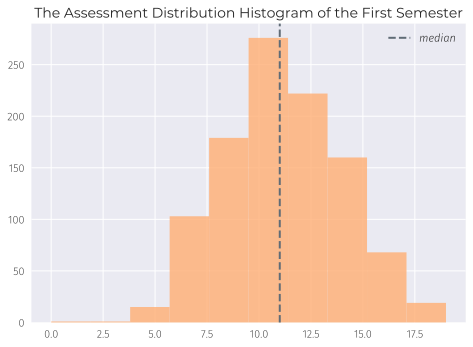

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(7.8, 5.51)

# Draw plot
data.G1.hist(color='#FFAE73', alpha=.8)
ax.axvline(x=data.G1.median(), c='#606C76', linestyle = '--', linewidth=2, label='median')

# Decoration
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.title('The Assessment Distribution Histogram of the First Semester',
          fontproperties='Montserrat',
          fontsize=14)
ax.legend(prop=font)
plt.show()

***
**Comment:** *Гистограмма распределения оценок за **1 полугодие ('G1')** по предметам.*
***

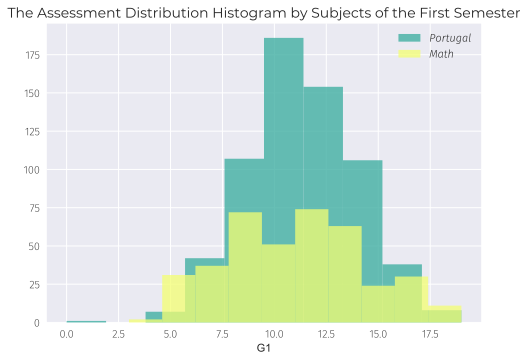

In [ ]:
plt.figure(figsize=(7.8, 5.51))

# Draw Plot
sns.distplot(data[data['Subject'] == 'Por']['G1'],
             color='#41AFA3',
             label='Portugal',
             kde=False,
             bins=10,
             hist_kws={'alpha':.8}
            )
sns.distplot(data[data['Subject'] == 'Math']['G1'],
             color='#F3FD72',
             label='Math',
             kde=False,
             bins=10,
             hist_kws={'alpha':.75}
            )

# Decoration
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.title('The Assessment Distribution Histogram by Subjects of the First Semester',
          fontproperties='Montserrat',
          fontsize=14)
plt.legend(prop=font)
plt.show()

***
**Comment:** *График плотности распределения оценок за **1 полугодие ('G1')** по предметам. Верхние точки графика плотности помогают отобразить, в каком интервале оценок сконцентрирована совокупность значений.*
***

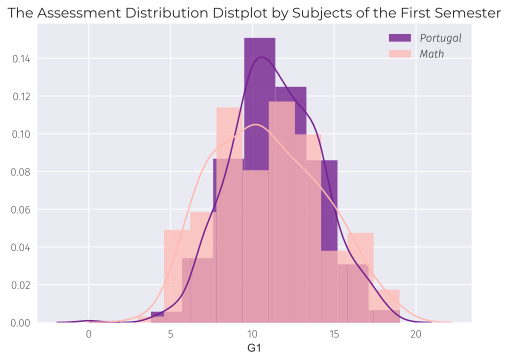

In [ ]:
plt.figure(figsize=(7.8, 5.51))

# Draw Plot
sns.distplot(data[data['Subject'] == 'Por']['G1'],
             color='#73218E',
             label='Portugal',
             bins=10,
             hist_kws={'alpha':.8},
             kde_kws={'linewidth':1.5}
            )
sns.distplot(data[data['Subject'] == 'Math']['G1'],
             color='#FFB9B2',
             label='Math',
             bins=10,
             hist_kws={'alpha':.75},
             kde_kws={'linewidth':1.5}
            )

# Decoration
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.title('The Assessment Distribution Distplot by Subjects of the First Semester',
          fontproperties='Montserrat',
          fontsize=14)
plt.legend(prop=font)
plt.show()

***
**Comment:** *Гистограмма распределения оценок за **2 полугодие ('G2')** (всего). Значение медианы = **11** (из таблицы Задания 3). Распределение оценок за 2 полугодие близко к нормальному, медиана близка к модальному значению.*
***

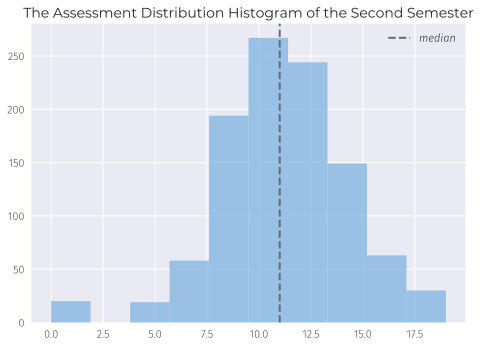

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(7.8, 5.51)

# Draw plot
data.G2.hist(color='#85B7E2', alpha=.8)
ax.axvline(x=data.G2.median(), c='#606C76', linestyle = '--', linewidth=2, label='median')

# Decoration
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.title('The Assessment Distribution Histogram of the Second Semester',
          fontproperties='Montserrat',
          fontsize=14)
ax.legend(prop=font)
plt.show()

***
**Comment:** *Гистограмма распределения оценок за **2 полугодие ('G2')** по предметам.*
***

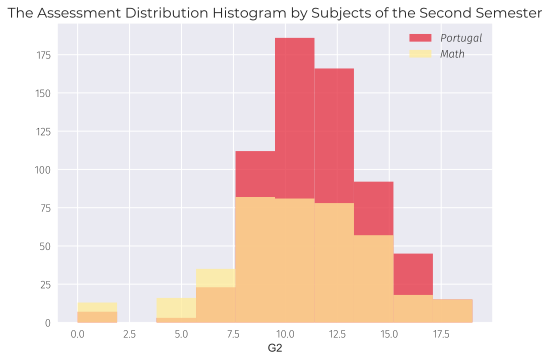

In [ ]:
plt.figure(figsize=(7.8, 5.51))

# Draw Plot
sns.distplot(data[data['Subject'] == 'Por']['G2'],
             color='#E63949',
             label='Portugal',
             kde=False,
             bins=10,
             hist_kws={'alpha':.8}
            )
sns.distplot(data[data['Subject'] == 'Math']['G2'],
             color='#FFEB96',
             label='Math',
             kde=False,
             bins=10,
             hist_kws={'alpha':.75}
            )

# Decoration
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.title('The Assessment Distribution Histogram by Subjects of the Second Semester',
          fontproperties='Montserrat',
          fontsize=14)
plt.legend(prop=font)
plt.show()

***
**Comment:** *График плотности распределения оценок за **2 полугодие ('G2')** по предметам.*
***

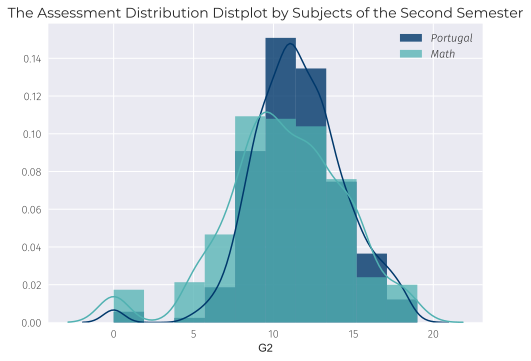

In [ ]:
plt.figure(figsize=(7.8, 5.51))

# Draw Plot
sns.distplot(data[data['Subject'] == 'Por']['G2'],
             color='#00386B',
             label='Portugal',
             bins=10,
             hist_kws={'alpha':.8},
             kde_kws={'linewidth':1.5}
            )
sns.distplot(data[data['Subject'] == 'Math']['G2'],
             color='#50B1B1',
             label='Math',
             bins=10,
             hist_kws={'alpha':.75},
             kde_kws={'linewidth':1.5}
            )

# Decoration
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.title('The Assessment Distribution Distplot by Subjects of the Second Semester',
          fontproperties='Montserrat',
          fontsize=14)
plt.legend(prop=font)
plt.show()

***
**Comment:** *Гистограмма распределения **итоговых ('G3')** оценок (всего). Значение медианы = **11** (из таблицы Задания 3). Распределение итоговых оценок близко к нормальному, медиана близка к модальному значению. Наблюдается достаточно большой выброс в районе **0**.*
***

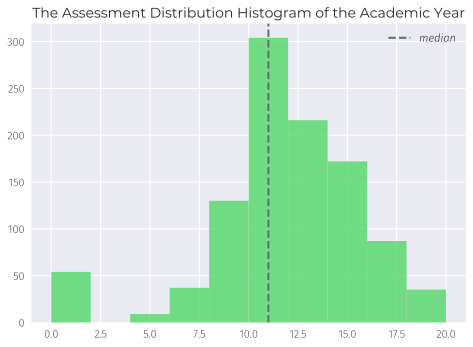

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(7.8, 5.51)

# Draw plot
data.G3.hist(color='#53D769', alpha=.8)
ax.axvline(x=data.G3.median(), c='#606C76', linestyle = '--', linewidth=2, label='median')

# Decoration
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.title('The Assessment Distribution Histogram of the Academic Year',
          fontproperties='Montserrat',
          fontsize=14)
ax.legend(prop=font)
plt.show()

***
**Comment:** *Гистограмма распределения **итоговых ('G3')** оценок по предметам.*
***

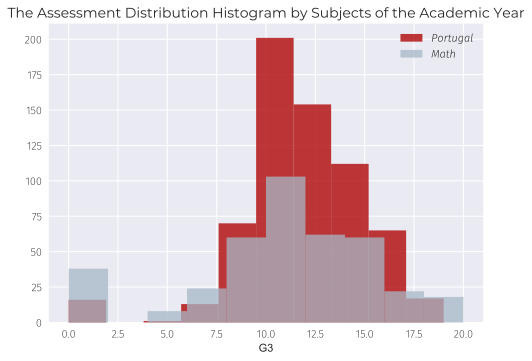

In [ ]:
plt.figure(figsize=(7.8, 5.51))

# Draw Plot
sns.distplot(data[data['Subject'] == 'Por']['G3'],
             color='#AF0808',
             label='Portugal',
             kde=False,
             bins=10,
             hist_kws={'alpha':.8}
            )
sns.distplot(data[data['Subject'] == 'Math']['G3'],
             color='#A5B6C5',
             label='Math',
             kde=False,
             bins=10,
             hist_kws={'alpha':.75}
            )

# Decoration
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.title('The Assessment Distribution Histogram by Subjects of the Academic Year',
          fontproperties='Montserrat',
          fontsize=14)
plt.legend(prop=font)
plt.show()

***
**Comment:** *График плотности распределения **итоговых ('G3')** оценок по предметам.*
***

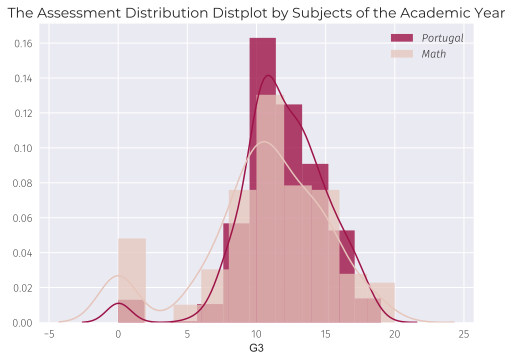

In [ ]:
plt.figure(figsize=(7.8, 5.51))

# Draw Plot
sns.distplot(data[data['Subject'] == 'Por']['G3'],
             color='#9D1348',
             label='Portugal',
             bins=10,
             hist_kws={'alpha':.8},
             kde_kws={'linewidth':1.5}
            )
sns.distplot(data[data['Subject'] == 'Math']['G3'],
             color='#E5C5BB',
             label='Math',
             bins=10,
             hist_kws={'alpha':.75},
             kde_kws={'linewidth':1.5}
            )

# Decoration
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.title('The Assessment Distribution Distplot by Subjects of the Academic Year',
          fontproperties='Montserrat',
          fontsize=14)
plt.legend(prop=font)
plt.show()

***
**Comment:** *Совместный boxplot распределения оценок за **G1, G2 и G3** (всего).*
***

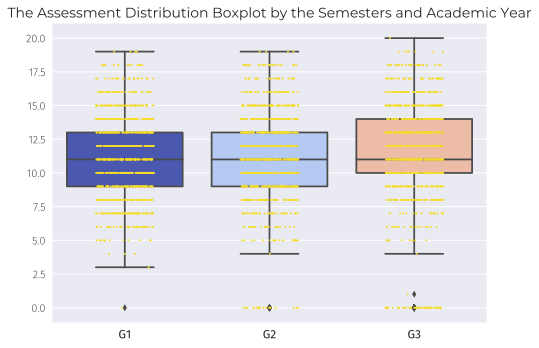

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((7.8, 5.51))

colors = [plt.cm.coolwarm(i/float(3)) for i in range(4)]

# Draw plot
ax = sns.boxplot(data=data.ix[:, 32:35], orient='v', palette=colors)
ax = sns.stripplot(data=data.ix[:, 32:35], color='#F4DC2A', jitter=0.2, size=2)

# Decoration
plt.xticks(fontproperties='Fira Sans', fontweight='regular', fontsize=12)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.title('The Assessment Distribution Boxplot by the Semesters and Academic Year',
          fontproperties='Montserrat',
          fontsize=14)
plt.show()

***
**Comment:** *Boxplot'ы для распределений оценок за **G1, G2, G3** по предметам.*
***

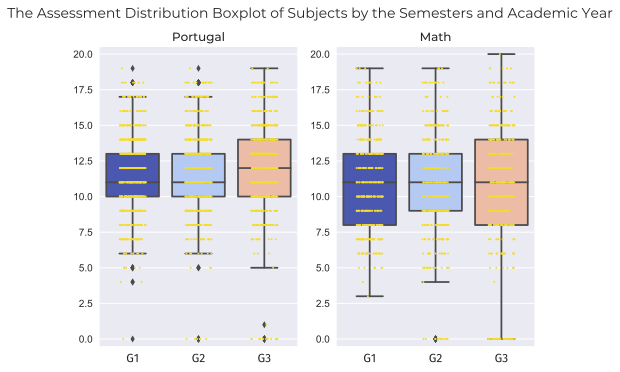

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches((7.8, 5.51))

colors = [plt.cm.coolwarm(i/float(3)) for i in range(4)]
font1 = {'family': 'Fira Sans', 'weight': 'regular', 'size': 12}

# Draw plot
sns.boxplot(data=data[data['Subject'] == 'Por'].ix[:, 32:35], orient='v', ax=ax[0], palette=colors)
sns.stripplot(data=data[data['Subject'] == 'Por'].ix[:, 32:35], color='#F4DC2A', jitter=0.2, size=2, ax=ax[0])
ax[0].set_ylim(-0.5, 20.5)
ax[0].set_title('Portugal',
                fontproperties='Montserrat',
                fontweight='medium',
                fontsize=12)
ax[0].set_xticklabels(labels=['G1', 'G2', 'G3'], fontdict=font1)

sns.boxplot(data=data[data['Subject'] == 'Math'].ix[:, 32:35], orient='v', ax=ax[1], palette=colors)
sns.stripplot(data=data[data['Subject'] == 'Math'].ix[:, 32:35], color='#F4DC2A', jitter=0.2, size=2, ax=ax[1])
ax[1].set_ylim(-0.5, 20.5)
ax[1].set_title('Math',
                fontproperties='Montserrat',
                fontweight='medium',
                fontsize=12)
ax[1].set_xticklabels(labels=['G1', 'G2', 'G3'], fontdict=font1)

# Decoration
fig.suptitle('The Assessment Distribution Boxplot of Subjects by the Semesters and Academic Year',
          fontproperties='Montserrat',
          fontsize=14)
plt.show()

### Задание 5  
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

In [ ]:
data_numeric_corr = data_new[['age', 'failures', 'absences', 'G1', 'G2', 'G3']].corr()
data_numeric_corr

,age,failures,absences,G1,G2,G3
age,1.000000,0.282364,0.153196,-0.124121,-0.119475,-0.125282
failures,0.282364,1.000000,0.099998,-0.374175,-0.377172,-0.383145
absences,0.153196,0.099998,1.000000,-0.092425,-0.089332,-0.045671
G1,-0.124121,-0.374175,-0.092425,1.000000,0.858739,0.809142
G2,-0.119475,-0.377172,-0.089332,0.858739,1.000000,0.910743
G3,-0.125282,-0.383145,-0.045671,0.809142,0.910743,1.000000


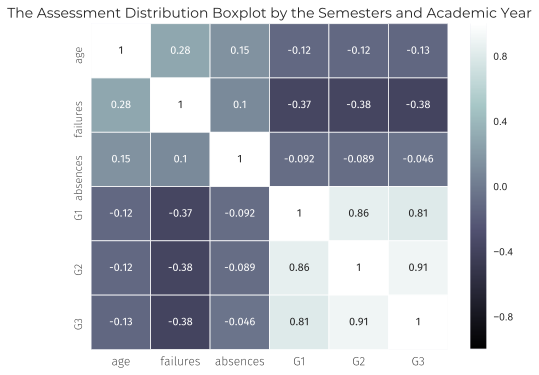

In [ ]:
plt.figure(figsize=(8,6))

sns.heatmap(data_numeric_corr,
            cmap=sns.color_palette('bone', 1000),
            vmin=-1,
            center=0,
            annot=True,
            annot_kws={'family': 'Fira Sans', 'weight': 'regular', 'size': 11},
            linewidths=.75)

plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=12)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.title('The Assessment Distribution Boxplot by the Semesters and Academic Year',
          fontproperties='Montserrat',
          fontsize=14)
plt.show()

***
**Comment:** *Самые высокие значения корреляции наблюдается между оценками G1, G2 и G3 (> 0,8). Так как итоговая оценка складывается исходя из оценок за полугодия, связь между этими признаками оправдана. При этом успеваемость учеников на протяжении года практически не меняется: сильный ученик, получивший за первое полугодие высокую оценку, вероятнее всего, получит похожую в следующем. Признак 'age' слабо отрицательно коррелирует с оценками, количество пропусков 'absences' слабо положительно коррелирует с возрастом 'age' и практически не коррелирует с оценками (наблюдается очень слабая отрицательная корреляция). С остальными признаками у оценок корреляция слабая: нет смысла искать этому логическое объяснение.*
***

### Задание 6  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

In [ ]:
data_categoric_corr = data_new[[i for i in data_new.columns.tolist()
                        if i not in ['ID', 'age', 'failures', 'absences', 'G1', 'G2', 'G3']]].corr()
data_categoric_corr

,Subject,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health
Subject,1.000000,0.256088,-0.062192,-0.087916,0.007705,-0.029497,-0.101246,-0.094795,-0.088938,-0.031495,-0.057926,-0.023752,0.079881,-0.060934,-0.037141,0.000590,-0.473453,-0.022794,0.009498,-0.096707,-0.078377,0.024763,-0.002174,-0.025949,0.032011,0.014337,-0.002556,-0.006205
school,0.256088,1.000000,-0.074955,-0.341657,0.034882,0.024030,-0.235114,-0.187611,-0.178121,-0.058046,-0.113445,-0.044470,0.258834,-0.133255,-0.130498,-0.088460,-0.130125,-0.097932,-0.019349,-0.131382,-0.222993,0.067034,-0.020386,0.026008,0.037000,0.067935,0.031532,-0.053214
sex,-0.062192,-0.074955,1.000000,0.011556,0.094361,0.051337,0.109387,0.070786,0.169959,0.083938,-0.026595,-0.048676,0.042508,-0.239972,-0.119411,-0.137696,-0.002179,0.116368,-0.030492,-0.078775,0.062671,-0.102310,0.051942,0.181603,0.062530,0.273275,0.307759,0.141113
address,-0.087916,-0.341657,0.011556,1.000000,0.054484,-0.074097,0.179720,0.124303,0.148470,-0.002097,-0.013449,-0.026218,-0.343803,0.037480,0.023583,0.011975,0.053024,-0.022095,0.031946,0.074716,0.194790,-0.020518,-0.019130,-0.009744,0.030790,-0.063957,-0.046776,-0.010895
famsize,0.007705,0.034882,0.094361,0.054484,1.000000,-0.207302,-0.025556,-0.047290,0.038054,-0.069065,0.012285,-0.000690,0.031550,-0.035109,-0.045552,-0.067340,-0.028290,-0.009434,0.101279,0.000650,0.008315,-0.006449,-0.024996,-0.007249,0.005889,0.075981,0.088417,-0.009147
Pstatus,-0.029497,0.024030,0.051337,-0.074097,-0.207302,1.000000,-0.077133,-0.049156,-0.035206,0.047796,-0.019548,-0.146354,0.033883,0.005049,-0.020789,0.013370,0.040341,0.100576,-0.054016,0.007339,0.065260,-0.031889,0.046816,0.038714,0.020498,0.011084,0.049631,0.016213
Medu,-0.101246,-0.235114,0.109387,0.179720,-0.025556,-0.077133,1.000000,0.642063,0.462509,0.156851,0.132149,-0.015261,-0.238181,0.090616,-0.023618,0.143063,0.161349,0.116924,0.149287,0.206551,0.249728,-0.003857,0.013541,0.001054,0.025614,-0.001976,-0.033129,-0.013254
Fedu,-0.094795,-0.187611,0.070786,0.124303,-0.047290,-0.049156,0.642063,1.000000,0.279218,0.209255,0.071571,-0.111164,-0.196328,0.033458,0.032450,0.153342,0.118897,0.093800,0.104681,0.191956,0.170012,-0.027551,0.001840,0.002142,0.030075,-0.002380,0.018084,0.034288
Mjob,-0.088938,-0.178121,0.169959,0.148470,0.038054,-0.035206,0.462509,0.279218,1.000000,0.202347,0.050186,0.012777,-0.150697,0.032181,-0.008008,0.043028,0.090399,0.101113,0.061191,0.139142,0.250488,-0.069978,0.017586,0.077780,0.000316,0.050121,0.005443,0.075821
Fjob,-0.031495,-0.058046,0.083938,-0.002097,-0.069065,0.047796,0.156851,0.209255,0.202347,1.000000,0.017739,-0.076344,0.020624,-0.039082,-0.011503,-0.035426,-0.011312,0.024366,-0.040356,0.051302,0.072254,-0.008117,0.024411,-0.040575,-0.017461,0.062535,0.052765,-0.022271


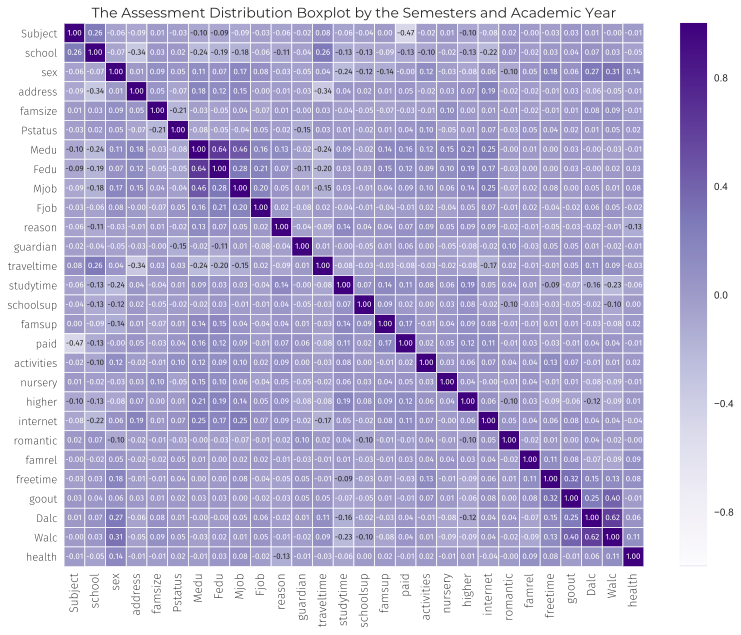

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(data_categoric_corr, 
            cmap=sns.color_palette('Purples', 1000),
            fmt='.2f',
            vmin=-1,
            center=0,
            annot=True,
            annot_kws={'family': 'Fira Sans', 'weight': 'regular', 'size': 8},
            linewidths=.75)

plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=12)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.title('The Assessment Distribution Boxplot by the Semesters and Academic Year',
          fontproperties='Montserrat',
          fontsize=14)
plt.show()

***
**Comment:** *Сильная корреляцию можно увидеть между признаками образования отца 'Fedu' и образованием матери 'Medu'. Возможно, одна и та же профессия (или обучение на одной и той же специальности) стало базой для развития их отношений. Сильная корреляция прослеживается между количеством алкоголя, выпитого в будни и в выходные 'Dalc', 'Walc' (0.62) и временем, проведенным с друзьями 'goout' (0.40). Думаю, связь понятна без объяснений. Средняя корреляция наблюдается между признаками 'freetime' и 'goout' (0.32), что вполне объяснимо, так как чем больше свободного времени у студента, тем больше он может проводить свободного времени с друзьями (в расслабляющей обстановке, исходя из предыдущей зависимости). Небольшая корреляция прослеживается между доступом в интернет 'internet' и образованием матери 'Medu' (0.25), а также адресом 'address' (0.18). Также небольшая корреляция (0.18) наблюдается между временем, затрачиваемым на учёбу в неделю 'studytime' и намерением поступать в университет 'higher'. Средняя отрицательная корреляция (-0.34) наблюдается между признаками 'address' и 'traveltime': чем дальше от школы ученик живет, тем дольше составляет его поездка к ней.*
***

***
**Comment:** *Провизуализируем зависимость между категориальными признаками с помощью теста Хи-квадрат Пирсона. В таблице: **Ind** (Independent) - признаки являются независимыми, **Dep** (Dependent) - признаки являются зависимыми.*
***

In [ ]:
categoric_col_list_1 = [i for i in data.columns.tolist()
                        if i not in ['ID', 'age', 'failures', 'absences', 'G1', 'G2', 'G3']]
categoric_col_list_2 = [i for i in data.columns.tolist()
                        if i not in ['ID', 'age', 'failures', 'absences', 'G1', 'G2', 'G3']]
categoric_col_pairs = []

for i in range(len(categoric_col_list_1)):
    categoric_col_pairs.extend([(categoric_col_list_1[i], y) for y in categoric_col_list_2])

for i in range(len(categoric_col_list_1)):
    categoric_col_list_1[i] = []
    
k = 0
for i in range(len(categoric_col_pairs)):
    table = pd.crosstab(data[categoric_col_pairs[i][0]], data[categoric_col_pairs[i][1]])

    # chi-squared test with similar proportions
    stat, p, dof, expected = chi2_contingency(table)

    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        res_1 = 'Dep'
    else:
        res_1 = 'Ind'
        
    # interpret p-value
    alpha = 1.0 - prob
    if p <= alpha:
        res_2 = 'Dep'
    else:
        res_2 = 'Ind'
    
    if res_1 == res_2:
        ans = res_1
    else:
        ans = 'Undef'
        
    if len(categoric_col_list_1[k]) != 28:
        categoric_col_list_1[k].append(ans)
    else:
        k += 1
        categoric_col_list_1[k].append(ans)
        
data_array_1 = np.vstack([categoric_col_list_1])
data_categoric_corr_1 = pd.DataFrame(data_array_1, columns=categoric_col_list_2, index=categoric_col_list_2)
data_categoric_corr_1

,Subject,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health
Subject,Dep,Dep,Ind,Dep,Ind,Ind,Dep,Dep,Dep,Ind,Dep,Ind,Dep,Ind,Ind,Ind,Dep,Ind,Ind,Dep,Dep,Ind,Ind,Ind,Ind,Ind,Ind,Ind
school,Dep,Dep,Dep,Dep,Ind,Ind,Dep,Dep,Dep,Dep,Dep,Ind,Dep,Dep,Dep,Dep,Dep,Dep,Ind,Dep,Dep,Dep,Dep,Dep,Ind,Ind,Ind,Ind
sex,Ind,Dep,Dep,Ind,Dep,Ind,Dep,Ind,Dep,Ind,Ind,Ind,Ind,Dep,Dep,Dep,Ind,Dep,Ind,Dep,Ind,Dep,Ind,Dep,Ind,Dep,Dep,Dep
address,Dep,Dep,Ind,Dep,Ind,Dep,Dep,Dep,Dep,Ind,Dep,Ind,Dep,Dep,Ind,Ind,Ind,Ind,Ind,Dep,Dep,Ind,Ind,Ind,Ind,Dep,Ind,Ind
famsize,Ind,Ind,Dep,Ind,Dep,Dep,Ind,Ind,Ind,Ind,Ind,Ind,Ind,Dep,Ind,Dep,Ind,Ind,Dep,Ind,Ind,Ind,Ind,Ind,Ind,Dep,Ind,Ind
Pstatus,Ind,Ind,Ind,Dep,Dep,Dep,Dep,Ind,Ind,Ind,Ind,Dep,Ind,Dep,Ind,Ind,Ind,Dep,Ind,Ind,Dep,Ind,Ind,Dep,Ind,Ind,Dep,Ind
Medu,Dep,Dep,Dep,Dep,Ind,Dep,Dep,Dep,Dep,Dep,Dep,Dep,Dep,Ind,Ind,Dep,Dep,Dep,Dep,Dep,Dep,Ind,Ind,Ind,Ind,Ind,Dep,Dep
Fedu,Dep,Dep,Ind,Dep,Ind,Ind,Dep,Dep,Dep,Dep,Ind,Dep,Dep,Dep,Ind,Dep,Dep,Dep,Dep,Dep,Dep,Ind,Ind,Ind,Ind,Ind,Dep,Dep
Mjob,Dep,Dep,Dep,Dep,Ind,Ind,Dep,Dep,Dep,Dep,Dep,Dep,Dep,Ind,Dep,Dep,Dep,Dep,Dep,Dep,Dep,Ind,Dep,Dep,Dep,Ind,Ind,Ind
Fjob,Ind,Dep,Ind,Ind,Ind,Ind,Dep,Dep,Dep,Dep,Dep,Dep,Ind,Dep,Dep,Dep,Ind,Ind,Ind,Ind,Ind,Ind,Dep,Ind,Ind,Ind,Dep,Ind


### Задание  7  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

***
**Comment:** *Определим по каждой записи среднее количество выпитого за целую неделю, добавим новый признак в **Dataframe**, содержащий пол студентов и количество потребляемого алкоголя.*
***

In [ ]:
data_alc_fm = pd.DataFrame(data, columns=['ID', 'sex', 'Dalc', 'Walc', 'Subject'])
data_alc_fm['Dalc'] = data_alc_fm['Dalc'].fillna(0)
data_alc_fm['Walc'] = data_alc_fm['Walc'].fillna(0)
average_column = []

d_alc = data_alc_fm.Dalc.tolist()
w_alc = data_alc_fm.Walc.tolist()

for i in range(len(d_alc)):
    if d_alc[i] != 0 and w_alc[i] != 0:
        average_column.append((d_alc[i] / 2) + (w_alc[i] / 2))
    elif d_alc[i] != 0 and w_alc[i] == 0:
        average_column.append((d_alc[i]) / 2)
    elif d_alc[i] == 0 and w_alc[i] != 0:
        average_column.append((w_alc[i]) / 2)

data_alc_fm['Dalc_Walc_mean'] = average_column
data_alc_fm.drop_duplicates(subset='ID', keep='first', inplace=True)
data_alc_fm.head()

,ID,sex,Dalc,Walc,Subject,Dalc_Walc_mean
0,100097,F,1.0,4.0,Por,2.5
1,101021,F,1.0,3.0,Por,2.0
2,102965,M,3.0,5.0,Por,4.0
3,102989,M,1.0,1.0,Por,1.0
4,103131,F,1.0,4.0,Por,2.5


***
**Comment:** *Гистограммы распределения количества алкоголя в будние дни и в выходные по половому признаку.*
***

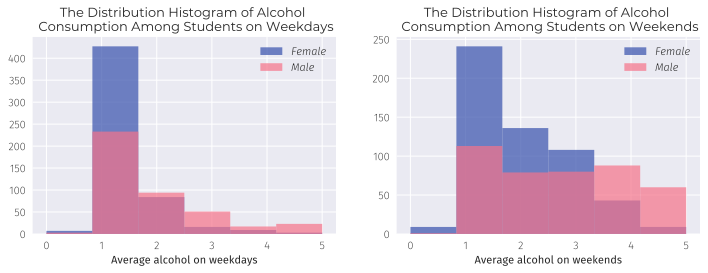

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True)

# Draw Plot 1
plt.subplot(221)
ax[0] = sns.distplot(data_alc_fm[data_alc_fm['sex'] == 'F']['Dalc'],
             color='#485FB3',
             label='Female',
             kde=False,
             bins=6,
             hist_kws={'alpha':.77}
            )
ax[0] = sns.distplot(data_alc_fm[data_alc_fm['sex'] == 'M']['Dalc'],
             color='#F6728A',
             label='Male',
             kde=False,
             bins=6,
             hist_kws={'alpha':.7}
            )

# Decoration 1
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.xlabel('Average alcohol on weekdays', fontproperties='Fira Sans', fontweight='regular', fontsize=11)
plt.title('The Distribution Histogram of Alcohol \n Consumption Among Students on Weekdays',
          fontproperties='Montserrat',
          fontsize=13)
plt.legend(prop=font)


# Draw Plot 2
plt.subplot(222)
ax[1] = sns.distplot(data_alc_fm[data_alc_fm['sex'] == 'F']['Walc'],
             color='#485FB3',
             label='Female',
             kde=False,
             bins=6,
             hist_kws={'alpha':.77}
            )
ax[1] = sns.distplot(data_alc_fm[data_alc_fm['sex'] == 'M']['Walc'],
             color='#F6728A',
             label='Male',
             kde=False,
             bins=6,
             hist_kws={'alpha':.7}
            )

# Decoration 2
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.xlabel('Average alcohol on weekends', fontproperties='Fira Sans', fontweight='regular', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.title('The Distribution Histogram of Alcohol \n Consumption Among Students on Weekends',
          fontproperties='Montserrat',
          fontsize=13)
plt.legend(prop=font)
plt.show()

***
**Comment:** *Таблица употребления алкоголя среди девушек и парней в будние и выходные дни (первые два столбца - будние дни, вторые - выходные).*
***

In [ ]:
data_alc_fm[data_alc_fm['sex'] == 'F']['Dalc'].value_counts().sum()
data_alc_fm_с1 = pd.crosstab(data_alc_fm['Dalc'], data_alc_fm['sex'])

list_lh1 = [data_alc_fm_с1[(data_alc_fm_с1.index.values <= 2.5) & (data_alc_fm_с1.index.values != 0.0)]['F'].sum(),
           data_alc_fm_с1[(data_alc_fm_с1.index.values <= 2.5) & (data_alc_fm_с1.index.values != 0.0)]['M'].sum()]

list_mh1 = [data_alc_fm_с1[data_alc_fm_с1.index.values > 2.5]['F'].sum(),
           data_alc_fm_с1[data_alc_fm_с1.index.values > 2.5]['M'].sum()]

list_all1 = [data_alc_fm_с1['F'].values.sum(), data_alc_fm_с1['M'].values.sum()]

data_alc_fm_с1.loc['<=2.5'] = list_lh1
data_alc_fm_с1.loc['>2.5'] = list_mh1
data_alc_fm_с1.loc['All'] = list_all1

data_alc_fm[data_alc_fm['sex'] == 'F']['Walc'].value_counts().sum()
data_alc_fm_с2 = pd.crosstab(data_alc_fm['Walc'], data_alc_fm['sex'])

list_lh2 = [data_alc_fm_с2[data_alc_fm_с2.index.values <= 2.5]['F'].sum(),
           data_alc_fm_с2[data_alc_fm_с2.index.values <= 2.5]['M'].sum()]

list_mh2 = [data_alc_fm_с2[data_alc_fm_с2.index.values > 2.5]['F'].sum(),
           data_alc_fm_с2[data_alc_fm_с2.index.values > 2.5]['M'].sum()]

list_all2 = [data_alc_fm_с2['F'].values.sum(), data_alc_fm_с2['M'].values.sum()]

data_alc_fm_с2.loc['<=2.5'] = list_lh2
data_alc_fm_с2.loc['>2.5'] = list_mh2
data_alc_fm_с2.loc['All'] = list_all2

data_alc_fm_с3 = pd.concat((data_alc_fm_с1, data_alc_fm_с2), axis = 1)
data_alc_fm_с3.index.names = ['Dalc / Walc']
data_alc_fm_с3.columns.names = ['sex']
data_alc_fm_с3

sex,F,M,F,M
Dalc / Walc,,,,
0.0,7,3,9,1
1.0,427,233,241,113
2.0,84,94,136,79
3.0,16,51,108,80
4.0,9,17,43,88
5.0,3,23,9,60
<=2.5,511,327,386,193
>2.5,28,91,160,228
All,546,421,546,421


***
**Comment:** *Видим, что обычно девушки выпивают в маленьких количествах (<2.5), а большинство парней в больших количествах (>2.5) как в будние, так и в выходные дни.*
***

***
**Comment:** *Гистограмма распределения среднего количества алкоголя в будние дни и в выходные по половому признаку.*
***

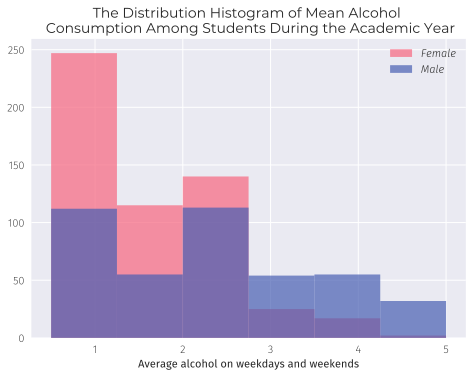

In [ ]:
plt.figure(figsize=(7.8, 5.51))

# Draw Plot
sns.distplot(data_alc_fm[data_alc_fm['sex'] == 'F']['Dalc_Walc_mean'],
             color='#F6728A',
             label='Female',
             kde=False,
             bins=6,
             hist_kws={'alpha':.77}
            )
sns.distplot(data_alc_fm[data_alc_fm['sex'] == 'M']['Dalc_Walc_mean'],
             color='#485FB3',
             label='Male',
             kde=False,
             bins=6,
             hist_kws={'alpha':.7}
            )

# Decoration
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.xlabel('Average alcohol on weekdays and weekends', fontproperties='Fira Sans', fontweight='regular', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.title('The Distribution Histogram of Mean Alcohol \n Consumption Among Students During the Academic Year',
          fontproperties='Montserrat',
          fontsize=14)
plt.legend(prop=font)
plt.show()

***
**Comment:** *Таблица употребления алкоголя в среднем среди девушек и парней в будние и выходные дни (первые два столбца - будние дни, вторые - выходные).*
***

In [ ]:
data_alc_fm[data_alc_fm['sex'] == 'F']['Dalc_Walc_mean'].value_counts().sum()
data_alc_fm_с = pd.crosstab(data_alc_fm['Dalc_Walc_mean'], data_alc_fm['sex'])

list_lh = [data_alc_fm_с[data_alc_fm_с.index.values <= 2.5]['F'].sum(),
           data_alc_fm_с[data_alc_fm_с.index.values <= 2.5]['M'].sum()]

list_mh = [data_alc_fm_с[data_alc_fm_с.index.values > 2.5]['F'].sum(),
           data_alc_fm_с[data_alc_fm_с.index.values > 2.5]['M'].sum()]

list_all = [data_alc_fm_с['F'].values.sum(), data_alc_fm_с['M'].values.sum()]

data_alc_fm_с.loc['<=2.5'] = list_lh

data_alc_fm_с.loc['>2.5'] = list_mh

data_alc_fm_с.loc['All'] = list_all
data_alc_fm_с

sex,F,M
Dalc_Walc_mean,,
0.5,11,1
1.0,236,111
1.5,115,55
2.0,74,72
2.5,66,41
3.0,25,54
3.5,12,35
4.0,5,20
4.5,0,10


***
**Comment:** *В целом, число девушек, употребляющих алкоголь, выше того же показателя у парней. Однако если рассматривать количество алкоголя, то девушки пьют количественно меньше, чем парни.*
***

In [ ]:
data_alc = data_new[['Dalc', 'Walc', 'address', 'Pstatus', 'higher', 'romantic', 'freetime', 'Fedu', 'Medu']].corr()
data_alc = data_alc.drop(['address', 'Pstatus', 'higher', 'romantic', 'freetime', 'Fedu', 'Medu'])
data_alc = data_alc.drop(['Dalc', 'Walc'], axis=1)
data_alc

,address,Pstatus,higher,romantic,freetime,Fedu,Medu
Dalc,-0.063957,0.011084,-0.115508,0.042424,0.149823,-0.002380,-0.001976
Walc,-0.046776,0.049631,-0.089803,-0.017701,0.132513,0.018084,-0.033129


***
**Comment:** *Наибольшая положительная корреляция наблюдается между употреблением алкоголя и количеством свободного времени. Остальные признаки практически никак не коррелируют с употреблением алкоголя.*
***

In [ ]:
data_G3 = data_new.sort_values('G3', ascending=False)
data_first_50 = data_G3[:50]
data_last_50 = data_G3[-50:]

***
**Comment:** *Гистограмма распределения потребления алкоголя по будням среди 50 лучших и 50 худших студентов.*
***

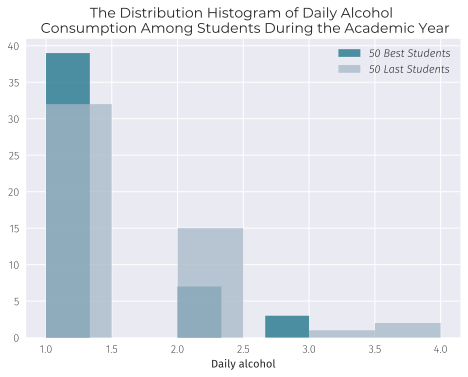

In [ ]:
plt.figure(figsize=(7.8, 5.51))

# Draw Plot
sns.distplot(data_first_50[data_first_50['Dalc'] != 0.0]['Dalc'],
             color='#23768D',
             label='50 Best Students',
             kde=False,
             bins=6,
             hist_kws={'alpha':.8}
            )
sns.distplot(data_last_50['Dalc'],
             color='#A5B6C5',
             label='50 Last Students',
             kde=False,
             bins=6,
             hist_kws={'alpha':.75}
            )

# Decoration
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.xlabel('Daily alcohol', fontproperties='Fira Sans', fontweight='regular', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.title('The Distribution Histogram of Daily Alcohol \n Consumption Among Students During the Academic Year',
          fontproperties='Montserrat',
          fontsize=14)
plt.legend(prop=font)
plt.show()

***
**Comment:** *Гистограмма распределения потребления алкоголя в выходные среди 50 лучших и 50 худших студентов.*
***

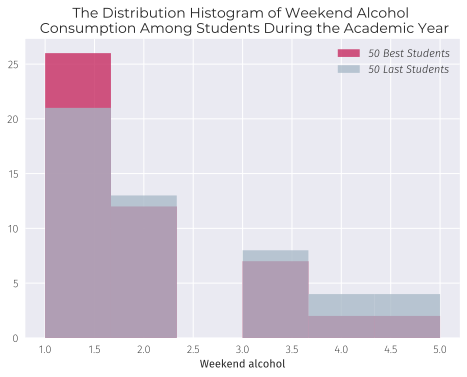

In [ ]:
plt.figure(figsize=(7.8, 5.51))

# Draw Plot
sns.distplot(data_first_50[data_first_50['Walc'] != 0.0]['Walc'],
             color='#C72C62',
             label='50 Best Students',
             kde=False,
             bins=6,
             hist_kws={'alpha':.8}
            )
sns.distplot(data_last_50['Walc'],
             color='#A5B6C5',
             label='50 Last Students',
             kde=False,
             bins=6,
             hist_kws={'alpha':.75}
            )

# Decoration
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.xlabel('Weekend alcohol', fontproperties='Fira Sans', fontweight='regular', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.title('The Distribution Histogram of Weekend Alcohol \n Consumption Among Students During the Academic Year',
          fontproperties='Montserrat',
          fontsize=14)
plt.legend(prop=font)
plt.show()

***
**Comment:** *Видно, что 50 лучших студентов в основном пьют очень редко (оценка 1) и по будням, и в выходные. А вот среди 50 худших студентов доля употребляющих алкоголь в больших количествах заметно возрастает к выходным.*
***

***
**Comment:** *Таблица употребления алкоголя в зависимости от предметов в будние и выходные дни (первые два столбца - будние дни, вторые - выходные).*
***

In [ ]:
data_alc_fm[data_alc_fm['Subject'] == 'Por']['Dalc'].value_counts().sum()
data_alc_fm_с4 = pd.crosstab(data_alc_fm['Dalc'], data_alc_fm['Subject'])

list_lh4 = [data_alc_fm_с4[(data_alc_fm_с4.index.values <= 2.5) & (data_alc_fm_с4.index.values != 0.0)]['Por'].sum(),
           data_alc_fm_с4[(data_alc_fm_с4.index.values <= 2.5) & (data_alc_fm_с4.index.values != 0.0)]['Math'].sum()]

list_mh4 = [data_alc_fm_с4[data_alc_fm_с4.index.values > 2.5]['Por'].sum(),
           data_alc_fm_с4[data_alc_fm_с4.index.values > 2.5]['Math'].sum()]

list_all4 = [data_alc_fm_с4['Por'].values.sum(), data_alc_fm_с4['Math'].values.sum()]

data_alc_fm_с4.loc['<=2.5'] = list_lh4
data_alc_fm_с4.loc['>2.5'] = list_mh4
data_alc_fm_с4.loc['All'] = list_all4

data_alc_fm[data_alc_fm['Subject'] == 'Por']['Walc'].value_counts().sum()
data_alc_fm_с5 = pd.crosstab(data_alc_fm['Walc'], data_alc_fm['Subject'])

list_lh5 = [data_alc_fm_с5[data_alc_fm_с5.index.values <= 2.5]['Por'].sum(),
           data_alc_fm_с5[data_alc_fm_с5.index.values <= 2.5]['Math'].sum()]

list_mh5 = [data_alc_fm_с5[data_alc_fm_с5.index.values > 2.5]['Por'].sum(),
           data_alc_fm_с5[data_alc_fm_с5.index.values > 2.5]['Math'].sum()]

list_all5 = [data_alc_fm_с5['Por'].values.sum(), data_alc_fm_с5['Math'].values.sum()]

data_alc_fm_с5.loc['<=2.5'] = list_lh5
data_alc_fm_с5.loc['>2.5'] = list_mh5
data_alc_fm_с5.loc['All'] = list_all5

data_alc_fm_с6 = pd.concat((data_alc_fm_с4, data_alc_fm_с5), axis = 1)
data_alc_fm_с6.index.names = ['Dalc / Walc']
data_alc_fm_с6.columns.names = ['sex']
data_alc_fm_с6

sex,Math,Por,Math,Por
Dalc / Walc,,,,
0.0,4,6,5,5
1.0,244,416,133,221
2.0,66,112,74,141
3.0,25,42,71,117
4.0,9,17,49,82
5.0,9,17,25,44
<=2.5,528,310,367,212
>2.5,76,43,243,145
All,610,357,610,357


***
**Comment:** *Видим, что число студентов, изучающих математику и употребляющих алкоголь, больше. Они также и в количественном отношении пьют больше.*
***

### Задание 8     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

***
***Comment:** *Матрица корреляций (по Пирсону, Kendall-Tau, Spearman) для оценки зависимости итоговой оценки от перечисленных признаков.*
***

In [ ]:
corr_list = ['pearson', 'kendall', 'spearman']
dataset_list = []

for i in range(len(corr_list)):
    dataset_list.append('data_mark' + str(i))

for i in range(len(corr_list)):
    dataset_list[i] = data_new[['G3', 'sex', 'traveltime', 'famsup', 'paid', 'internet', 'romantic', 'Dalc', 'Walc']].corr(corr_list[i])
    dataset_list[i] = dataset_list[i].drop(['sex', 'traveltime', 'famsup', 'paid', 'internet', 'romantic', 'Dalc', 'Walc'])
    dataset_list[i] = dataset_list[i].drop(['G3'], axis=1)
    dataset_list[i] = dataset_list[i].rename(index={'G3': 'G3 ({})'.format(corr_list[i])})

data_mark = pd.concat((dataset_list[0], dataset_list[1], dataset_list[2]), axis = 0)
data_mark

,sex,traveltime,famsup,paid,internet,romantic,Dalc,Walc
G3 (pearson),-0.031472,-0.102627,0.013313,-0.049388,0.107064,-0.087705,-0.134622,-0.116715
G3 (kendall),-0.038231,-0.097710,-0.001256,-0.062500,0.104654,-0.059096,-0.144657,-0.115739
G3 (spearman),-0.044830,-0.119138,-0.001473,-0.073289,0.122719,-0.069626,-0.178282,-0.148857


***
**Comment:** *Рассматривая корреляции, рассчитанные разными методами, можно прийти к одному выводу: наибольшая отрицательная корреляция наблюдается между итоговой оценкой и частотой употреблённого алкоголя, а наиболее высокая положительная корреляция наблюдается между итоговой оценкой и доступом в интернет, что вполне логично.*
***

### Задание 9  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

In [ ]:
data['New Grades'] = data['G3']
data.loc[data['New Grades'] < 8, 'New Grades'] = 1
data.loc[data['New Grades'] >= 18, 'New Grades'] = 4
data.loc[data['New Grades'] >= 14, 'New Grades'] = 3
data.loc[data['New Grades'] >= 8, 'New Grades'] = 2

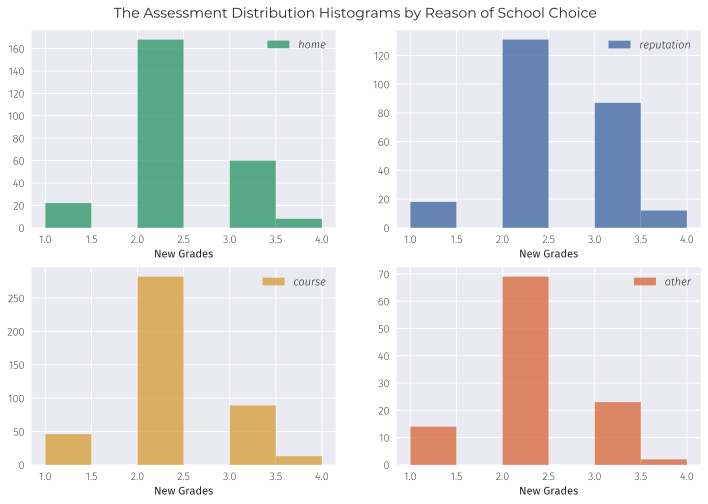

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)

# Draw Plot 1
plt.subplot(221)
ax[0, 0] = sns.distplot(data[data['reason'] == 'home']['New Grades'],
                     color='#259263',
                     label='home',
                     kde=False,
                     bins=6,
                     hist_kws={'alpha':.75}
                    )

# Decoration 1
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.xlabel('New Grades', fontproperties='Fira Sans', fontweight='regular', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.legend(prop=font)

# Draw Plot 2
plt.subplot(222)
ax[0, 1] = sns.distplot(data[data['reason'] == 'reputation']['New Grades'],
                     color='#39609E',
                     label='reputation',
                     kde=False,
                     bins=6,
                     hist_kws={'alpha':.75}
                    )

# Decoration 2
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.xlabel('New Grades', fontproperties='Fira Sans', fontweight='regular', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.legend(prop=font)

# Draw Plot 3
plt.subplot(223)
ax[1, 0] = sns.distplot(data[data['reason'] == 'course']['New Grades'],
                     color='#D49B35',
                     label='course',
                     kde=False,
                     bins=6,
                     hist_kws={'alpha':.75}
                    )

# Decoration 3
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.xlabel('New Grades', fontproperties='Fira Sans', fontweight='regular', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.legend(prop=font)

# Draw Plot 4
plt.subplot(224)
ax[1, 1] = sns.distplot(data[data['reason'] == 'other']['New Grades'],
                     color='#D46335',
                     label='other',
                     kde=False,
                     bins=6,
                     hist_kws={'alpha':.75}
                    )

# Decoration 4
plt.xticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.xlabel('New Grades', fontproperties='Fira Sans', fontweight='regular', fontsize=11)
plt.yticks(fontproperties='Fira Sans', fontweight='light', fontsize=11)
plt.legend(prop=font)
fig.suptitle('The Assessment Distribution Histograms by Reason of School Choice',
             fontproperties='Montserrat',
             fontsize=14,
             y=0.92)
plt.show()

***
**Comment:** *Распределения оценок в зависимости от причины в целом очень похожи, за исключением признака reputation: в соответствии с гистограммой, доля "хорошистов", которые выбрали школу на основе репутации, заметно выше, по сравнению с аналогичными долями в других распределениях (примерно равна доле распределения, где reason = 'course', однако общее число студентов, выбравших школу на основе репутации, практически в 2 раза меньше, чем студентов, выбравших школу на основе читаемых в ней курсов).*
***

### Задание  10 <a id="task10"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

***
**Comment:** *Проверка и замена повторов выполнена после задания №1.*
***

### Задание 11  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

In [ ]:
data_new['New Grades'] = data_new['G3']
data_new.loc[data_new['New Grades'] < 8, 'New Grades'] = 1
data_new.loc[data_new['New Grades'] >= 18, 'New Grades'] = 4
data_new.loc[data_new['New Grades'] >= 14, 'New Grades'] = 3
data_new.loc[data_new['New Grades'] >= 8, 'New Grades'] = 2

***
**Comment:** *Для предсказания итоговой оценки можно было бы использовать модель, в которой итоговые оценки были бы распределены на четыре кластера (при помощи k-means), признаки были бы выбраны на основе наибольшей корреляции с новыми оценками (по 4-х бальной шкале). Однако в итоге получили бы не очень хороший результат, потому что, как было выявлено выше, корреляция между признаками крайне слабая.*


*Поэтому для своей работы я решила воспользоваться алгоритмами: **Случайный Лес (Random Forest)** и **Наивный Байесовский классификатор** (последний, к слову, предполагает допущение о независимости признаков).*
***

In [ ]:
pred_data = data_new[['Subject', 'address', 'Medu', 'Fedu', 'studytime', 'failures',
                      'schoolsup', 'higher', 'internet', 'Dalc', 'Walc', 'New Grades']]

X_to_be_predicted = pred_data.copy(deep=True)
X_to_be_predicted = X_to_be_predicted.drop(['New Grades'], axis = 1)

# Training data
train_data = data_new.copy(deep=True)
train_data = train_data.dropna()[:100]
feature_train = train_data['New Grades']
label_train = train_data.drop(['New Grades'], axis = 1)

In [ ]:
%%time

# Random forest
clf = RandomForestClassifier(criterion='entropy',
                             n_estimators=50,
                             min_samples_split=10,
                             min_samples_leaf=5,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)

clf.fit(x_train, np.ravel(y_train))
print('RF Accuracy: {}%'.format(repr(round(clf.score(x_test, y_test) * 100, 2))))
result_rf = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
print('The cross validated score for Random forest is: {}'.format(round(result_rf.mean() * 100, 2)))

In [ ]:
%%time

# Gaussian
clf = GaussianNB()

x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)

clf.fit(x_train, np.ravel(y_train))
print('NB Accuracy: {}%'.format(repr(round(clf.score(x_test, y_test) * 100, 2))))
result_rf = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
print('The cross validated score for GaussianNB is: {}'.format(round(result_rf.mean() * 100, 2)))

***
**Comment:** *В целом, **Случайный Лес** показал гораздо лучшие результаты предсказания итоговой оценки.*
***

### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

In [ ]:
# your code here